# Data Segmentation
In this notebook, a larger training data of approximately six weeks is used. 

In [7]:
# Reading the dataset
import pandas as pd
selected_rentals = pd.read_csv(r"C:\Users\singh\Desktop\TUD (All Semesters)\Courses - Semester 5 (TU Dresden)\Research Task - Spatial Modelling\Code\rentals_working_with_subway_stations.csv")
selected_rentals.columns

Index(['#_rentals', 'datetime', 'year', 'month', 'day', 'hour', 'ID',
       'coordinates', '#_rentals_lag_1', 'name_of_day', 'weekend',
       'is_holiday', '#_rentals_lag_2', 'prev_day', 'prev_week', 'roll_avg',
       'w_avg_lag_1', 'w_avg_prev_day', 'w_avg_roll_avg', 'w_avg_lag_2',
       'temp', 'rhum', 'prcp', 'wspd', 'rush_hr', 'MapID', 'coco',
       'sb_st_800'],
      dtype='object')

In [5]:
# Days in March
selected_rentals.loc[selected_rentals.month == 3, "day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [6]:
# Days in April
selected_rentals.loc[selected_rentals.month == 4, "day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

## Test Sets

In [8]:
# Creating the test set for March, 2024
test_set_mar = selected_rentals.loc[(selected_rentals.month == 3) & (selected_rentals.day >= 25),:]

# Creating the test set for April, 2024
test_set_apr = selected_rentals.loc[(selected_rentals.month == 4) & (selected_rentals.day >= 24),:]

# Verifying
print(test_set_mar.day.unique())
print(test_set_apr.day.unique())

[25 26 27 28 29 30 31]
[24 25 26 27 28 29 30]


## Validation Set

In [9]:
# Creating the validation set for March, 2024
val_set_mar = selected_rentals.loc[(selected_rentals.month == 3) & (selected_rentals.day < 25) & (selected_rentals.day >= 18),:]

# Creating the validation set for April, 2024
val_set_apr = selected_rentals.loc[(selected_rentals.month == 4) & (selected_rentals.day < 24) & (selected_rentals.day >= 17),:]

# Verifying
print(val_set_mar.day.unique())
print(val_set_apr.day.unique())

[18 19 20 21 22 23 24]
[17 18 19 20 21 22 23]


## Training Set

In [10]:
# Creating the training set for March, 2024
train_set_mar = selected_rentals.loc[((selected_rentals.month == 3) & (selected_rentals.day < 18)) | ((selected_rentals.month == 2) & (selected_rentals.day >= 5)),:]

# Creating the training set for April, 2024
train_set_apr = selected_rentals.loc[((selected_rentals.month == 4) & (selected_rentals.day < 17)) | ((selected_rentals.month == 3) & (selected_rentals.day >= 6)),:]

# Verifying for March
print(len(train_set_mar.loc[train_set_mar.month == 3, "day"].unique()) + len(train_set_mar.loc[train_set_mar.month == 2, "day"].unique()))
                                                                                                      
# Verifying for April
print(len(train_set_apr.loc[train_set_apr.month == 4, "day"].unique()) + len(train_set_apr.loc[train_set_apr.month == 3, "day"].unique()))

42
42


# Baseline Model
Here two models are generated, one for April and the other for March. Additional features will be added on top of these two models.

In [18]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1"]], columns = ["ID"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1"]], columns = ["ID"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1"]], columns = ["ID"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1"]], columns = ["ID"], drop_first=False)

In [22]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [23]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.892136908163265 0.4249482641730312
5.822993418367347 0.4408592117624076


## Adding MapID to the baseline
Borough and sub-borough information is added to the baseline model to look for any improvement in performance.

In [24]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID"]], columns = ["ID","MapID"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID"]], columns = ["ID","MapID"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID"]], columns = ["ID","MapID"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID"]], columns = ["ID","MapID"], drop_first=False)

In [25]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [26]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.8735501530612244 0.4276944023580478
5.535596224489796 0.46845592739926334


## Adding weather information
This includes adding five features to the baseline.

In [58]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco"]], columns = ["ID","MapID"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco"]], columns = ["ID","MapID"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco"]], columns = ["ID","MapID"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco"]], columns = ["ID","MapID"], drop_first=False)

In [59]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [60]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.3351453367346937 0.50724212421665
4.9269805918367355 0.5268969731167368


## Name of Day
Adding name of day to the baseline model, using one hot encoding.

In [61]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [62]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [63]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.182960275510204 0.5297270176541153
4.636168204081632 0.5548216256168998


## Adding Weekend Indicator

In [64]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [65]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [66]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.1435700612244903 0.5355468055069237
4.612567826530612 0.557087802608438


## Adding Lagged Rentals (t-1), from nearby stations

In [67]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1']], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1']], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1']], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1']], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [68]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [69]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.082873959183673 0.5445144753654266
4.635815306122449 0.5548555119068006


The MSE for April actually increased. Although there is improvement in the month of March!

## Adding Rentals from previous day, from nearby stations only

In [71]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1','w_avg_prev_day']], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1','w_avg_prev_day']], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1','w_avg_prev_day']], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1','w_avg_prev_day']], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [72]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [73]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.2647125612244894 0.5176483588306755
4.798956142857143 0.5391902535951825


**Here, the performance clearly got worse for both the months. Hence, this variable should not be added.** What if this variable is added by removing the *lagged (t-1) rentals, from nearby stations?*

In [74]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_prev_day']], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_prev_day']], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_prev_day']], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_prev_day']], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [75]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [76]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.3331222551020407 0.5075410285542998
4.859367051020408 0.533389422238923


This leads to even worse performance. Hence, *lagged (t-1) rentals, from nearby stations* should not be removed.

## Adding Rolling average, from past 7 days

In [77]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1','w_avg_prev_day',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1','w_avg_prev_day',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1','w_avg_prev_day',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1','w_avg_prev_day',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [78]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [79]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.0585510510204075 0.5481081132280389
4.710675520408163 0.5476672160912293


The performance does not seem to improve much. Does removing *previous day rentals, from nearby stations* help improve performance?

In [80]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [81]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [82]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.0194672244897958 0.5538826331947053
4.677237010204082 0.5508780792349219


Removing *weighted average of previous day rentals, from nearby stations* does improve performance!

Does removing both *lagged rentals (t-1) and weighted avg of previous day rentals, both from nearby stations* help improve performance?

In [83]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend","roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend","roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend","roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend","roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [84]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [85]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.1149506734693877 0.5397752355429687
4.699512459183674 0.5487391257438348


No, removing both is not yielding superior performance. Hence *lagged rentals (t-1), from nearby stations* should be kept.

## Adding rentals from rolling average, from nearby stations
This time rolling average only from nearby stations is considered (weights are assigned using the Gaussian Kernel). Additionally, the variable <u>weighted average of previous day rentals, from nearby stations</u>, is left out because it's damaging performance.

In [86]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg",'w_avg_roll_avg']], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg",'w_avg_roll_avg']], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg",'w_avg_roll_avg']], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg",'w_avg_roll_avg']], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [87]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [88]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.0174125918367345 0.5541861991024595
4.690355897959184 0.5496183654222546


This is not really contributing to the performance. It's better to leave it out.

# Conclusion
Out of the 13 generated features, only six contribute towards performance increase. The Average MSE and average r2 score plots are visualised below to track performance change with every addition of a new feature in the model.

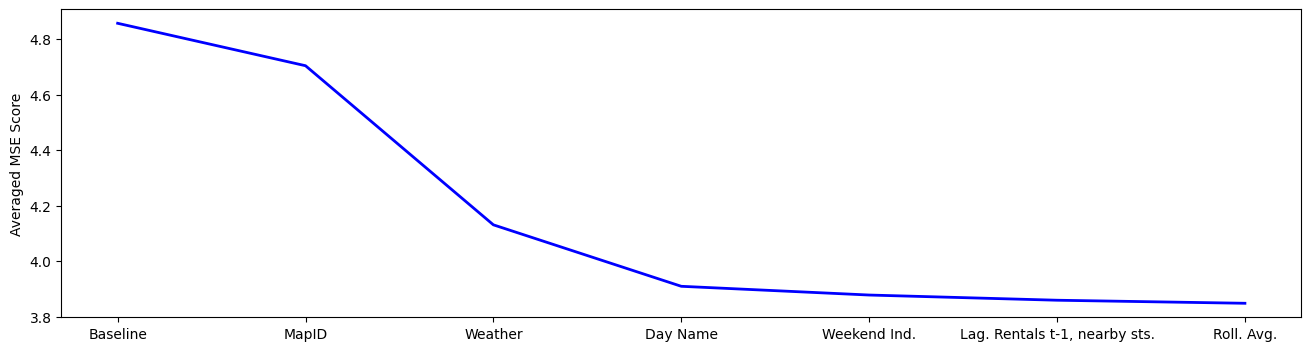

In [100]:
# Plotting change in performance - MSE

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16, 4))
x = ["Baseline","MapID","Weather","Day Name", "Weekend Ind.", "Lag. Rentals t-1, nearby sts.", "Roll. Avg."]
avg_MSE = [np.mean([3.892136908163265,5.822993418367347]),np.mean([3.8735501530612244,5.535596224489796]),np.mean([3.3351453367346937, 4.9269805918367355]),np.mean([3.182960275510204, 4.636168204081632]),np.mean([3.1435700612244903, 4.612567826530612]),np.mean([3.082873959183673, 4.635815306122449]),np.mean([3.0194672244897958, 4.677237010204082])]
plt.plot(x, avg_MSE, label='MSE averaged over Mar/Apr', color='blue', linewidth=2)

plt.ylabel("Averaged MSE Score")

# Show the plot
plt.show()

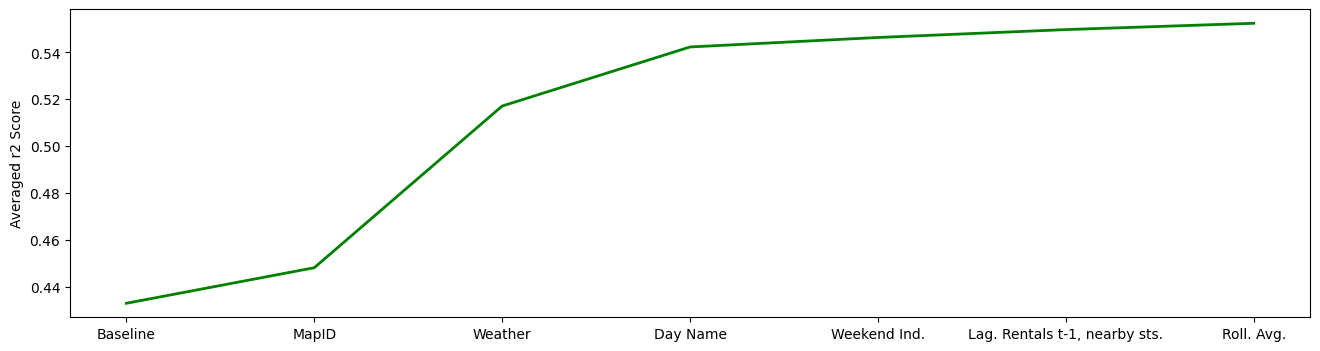

In [101]:
# Plotting change in performance - r2 score

plt.figure(figsize=(16, 4))
avg_r2 = [np.mean([0.4249482641730312, 0.4408592117624076]),np.mean([0.4276944023580478, 0.46845592739926334]),np.mean([0.50724212421665, 0.5268969731167368]),np.mean([0.5297270176541153, 0.5548216256168998]),np.mean([0.5355468055069237, 0.557087802608438]),np.mean([0.5445144753654266, 0.5548555119068006]),np.mean([0.5538826331947053, 0.5508780792349219])]
plt.plot(x, avg_r2, label='r2 score averaged over Mar/Apr', color='green', linewidth=2)
plt.ylabel("Averaged r2 Score")

# Show the plot
plt.show()

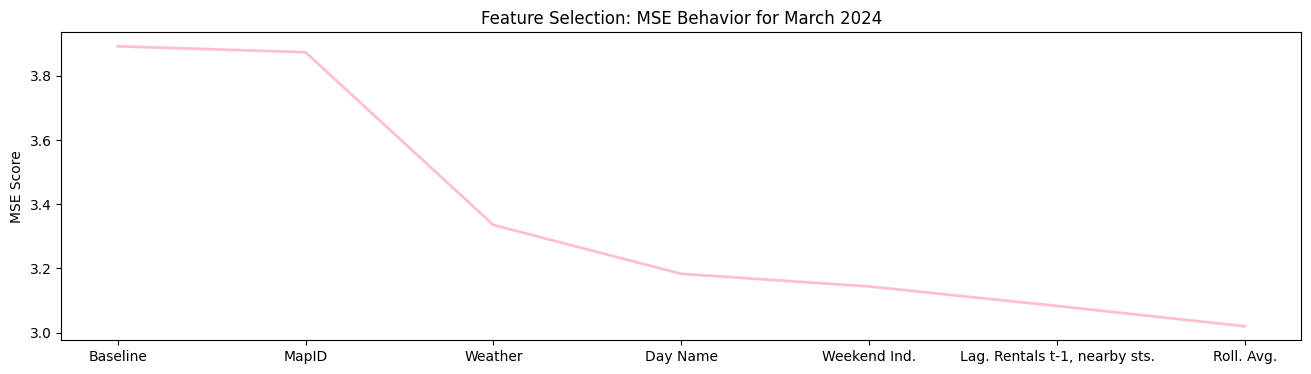

In [3]:
# MSE Plot for March
# Plotting change in performance - MSE

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16, 4))
x = ["Baseline","MapID","Weather","Day Name", "Weekend Ind.", "Lag. Rentals t-1, nearby sts.", "Roll. Avg."]
MSE_Mar = [np.mean([3.892136908163265]),np.mean([3.8735501530612244]),np.mean([3.3351453367346937]),np.mean([3.182960275510204]),np.mean([3.1435700612244903]),np.mean([3.082873959183673]),np.mean([3.0194672244897958])]
plt.plot(x, MSE_Mar, color='pink', linewidth=2)

plt.title("Feature Selection: MSE Behavior for March 2024")
plt.ylabel("MSE Score")

# Show the plot
plt.show()

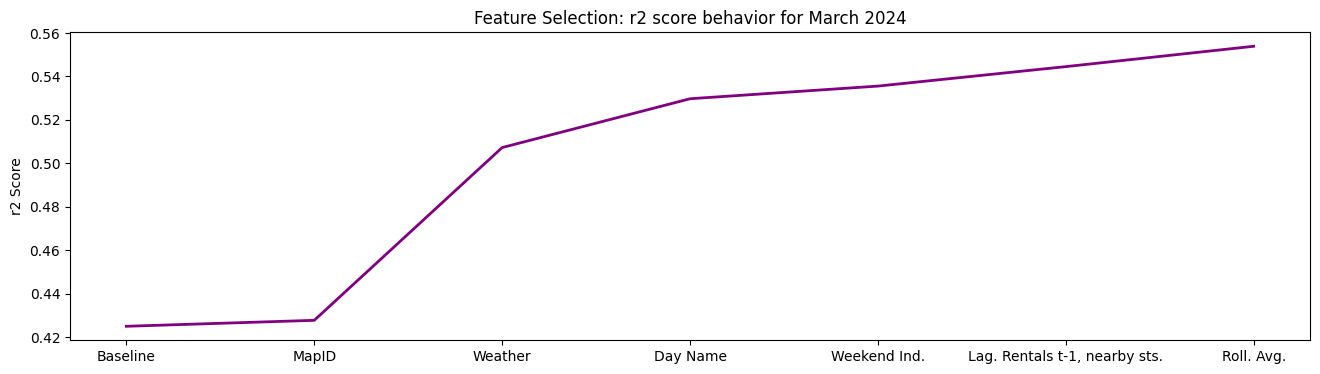

In [4]:
# R2 score plot for March
# Plotting change in performance - MSE

plt.figure(figsize=(16, 4))
x = ["Baseline","MapID","Weather","Day Name", "Weekend Ind.", "Lag. Rentals t-1, nearby sts.", "Roll. Avg."]
r2_Mar = [np.mean([0.4249482641730312]),np.mean([0.4276944023580478]),np.mean([0.50724212421665]),np.mean([0.5297270176541153]),np.mean([0.5355468055069237]),np.mean([0.5445144753654266]),np.mean([0.5538826331947053])]
plt.plot(x, r2_Mar, color='purple', linewidth=2)

plt.title("Feature Selection: r2 score behavior for March 2024")
plt.ylabel("r2 Score")

# Show the plot
plt.show()

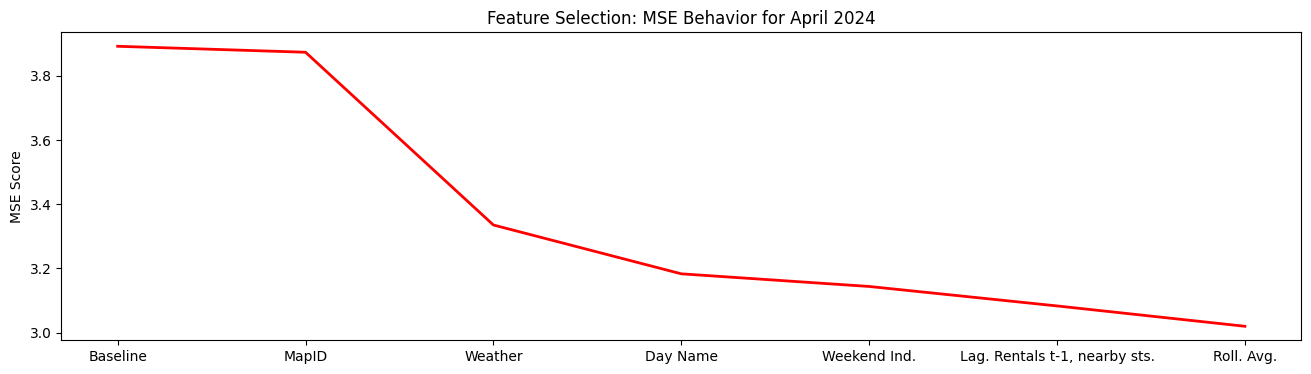

In [5]:
# MSE Plot for April
# Plotting change in performance - MSE

plt.figure(figsize=(16, 4))
x = ["Baseline","MapID","Weather","Day Name", "Weekend Ind.", "Lag. Rentals t-1, nearby sts.", "Roll. Avg."]
MSE_Apr = [np.mean([5.822993418367347]),np.mean([5.535596224489796]),np.mean([4.9269805918367355]),np.mean([4.636168204081632]),np.mean([4.612567826530612]),np.mean([4.635815306122449]),np.mean([4.677237010204082])]
plt.plot(x, MSE_Mar, color='red', linewidth=2)

plt.title("Feature Selection: MSE Behavior for April 2024")
plt.ylabel("MSE Score")

# Show the plot
plt.show()

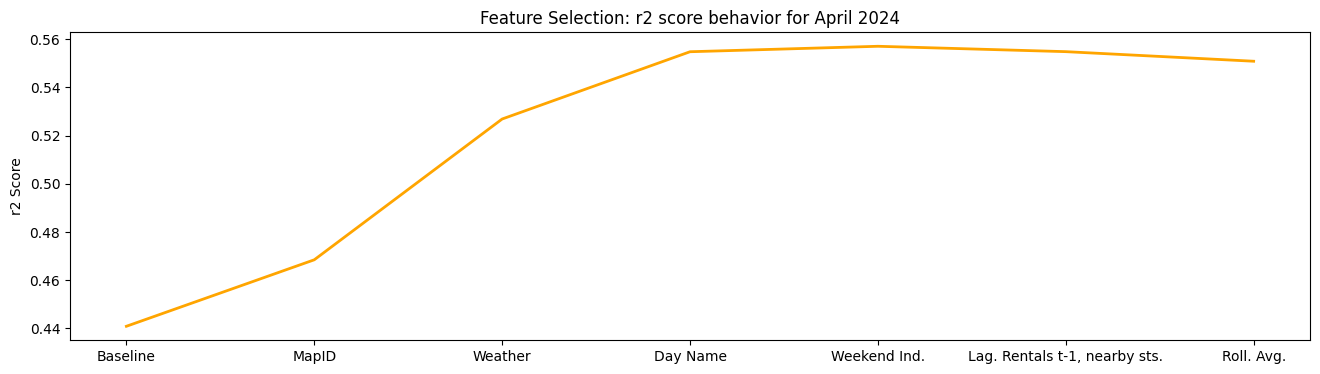

In [6]:
# R2 score plot for April
# Plotting change in performance - MSE

plt.figure(figsize=(16, 4))
x = ["Baseline","MapID","Weather","Day Name", "Weekend Ind.", "Lag. Rentals t-1, nearby sts.", "Roll. Avg."]
r2_Apr = [np.mean([0.4408592117624076]),np.mean([0.46845592739926334]),np.mean([0.5268969731167368]),np.mean([0.5548216256168998]),np.mean([0.557087802608438]),np.mean([0.5548555119068006]),np.mean([0.5508780792349219])]

plt.plot(x, r2_Apr, color='orange', linewidth=2)

plt.title("Feature Selection: r2 score behavior for April 2024")
plt.ylabel("r2 Score")

# Show the plot
plt.show()

## Tuning - Basic RF
Now that the feature selection process is completed, the existing performance of the random forest learner can be improved using hyperparameter tuning. For both models, performance evaluation is done only on the validation set from March 2024 (i.e. third week of March) to indentify the best hyperparameters. These hyperparameter values are then used for both models. 

### Re-creating the full model

In [11]:
# creating dummies for the ID feature (station ID)
train_set_mar_dum = pd.get_dummies(train_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
train_set_apr_dum = pd.get_dummies(train_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

# Repeating for the test set
test_set_mar_dum = pd.get_dummies(test_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
test_set_apr_dum = pd.get_dummies(test_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [12]:
# Separating features from the target: March

X_train_mar = train_set_mar_dum[list(train_set_mar_dum.columns)[1:]]
y_train_mar = train_set_mar_dum["#_rentals"]

X_test_mar = test_set_mar_dum[list(test_set_mar_dum.columns)[1:]]
y_test_mar = test_set_mar_dum["#_rentals"]


# Separating features from the target: April

X_train_apr = train_set_apr_dum[list(train_set_apr_dum.columns)[1:]]
y_train_apr = train_set_apr_dum["#_rentals"]

X_test_apr = test_set_apr_dum[list(test_set_apr_dum.columns)[1:]]
y_test_apr = test_set_apr_dum["#_rentals"]

In [13]:
# Training for March
from sklearn.ensemble import RandomForestRegressor
baseline_forest_mar = RandomForestRegressor(random_state=2) 
baseline_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = baseline_forest_mar.predict(X_test_mar)

# Training for April
baseline_forest_apr = RandomForestRegressor(random_state=2) 
baseline_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = baseline_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.0194672244897958 0.5538826331947053
4.677237010204082 0.5508780792349219


Hence, the MSE for March is 3.01 and for April is 4.67. The r2 score for March is 0.553 and for April is 0.551.

### Preparing the Validation Set

In [15]:
# Creating dummies 

val_set_mar_dum = pd.get_dummies(val_set_mar[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)
val_set_apr_dum = pd.get_dummies(val_set_apr[["#_rentals", "month", "day", "hour", "ID", "#_rentals_lag_1","MapID", "temp", "rhum", "prcp", "wspd", "coco", "name_of_day", "weekend",'w_avg_lag_1',"roll_avg"]], columns = ["ID","MapID","name_of_day"], drop_first=False)

In [16]:
# Separating features from the target: March
X_val_mar = val_set_mar_dum[list(val_set_mar_dum.columns)[1:]]
y_val_mar = val_set_mar_dum["#_rentals"]

# Separating features from the target: April
X_val_apr = val_set_apr_dum[list(val_set_apr_dum.columns)[1:]]
y_val_apr = val_set_apr_dum["#_rentals"]

In [23]:
# Defining the hyperparameter space - attempt 1

param_dist = {
    'n_estimators': np.arange(25,35,2),     # Number of trees
    'max_depth': np.arange(5,25,5),         # Maximum depth of each tree
    'min_samples_split': np.arange(2,5,1),  # Minimum samples required to split a node
    'min_samples_leaf': np.arange(2,5,1),   # Minimum samples at a leaf node
}

In [24]:
# Settting up the randomised search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Initialize RandomizedSearchCV with the already trained model (for March only) - attempt 1

random_search = RandomizedSearchCV(
    estimator = baseline_forest_mar,  # Pre-trained model for March
    param_distributions = param_dist,
    n_iter = 40,  # Number of random combinations to try
    cv = None,    # Can't be used since temporal dependencies are present
    scoring ='neg_mean_squared_error',
    n_jobs = -1,  # Use all CPU cores
    random_state=42
)

In [25]:
# Fit RandomizedSearchCV (this does tuning but does not re-train your initial model)
random_search.fit(X_train_mar, y_train_mar)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters found:", best_params)

Best hyperparameters found: {'n_estimators': 33, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 15}


In [26]:
# Evaluating performance on the validation set
best_rf = random_search.best_estimator_
y_val_pred_mar = best_rf.predict(X_val_mar)

# Calculate score on validation set
print(mean_squared_error(y_val_mar, y_val_pred_mar), r2_score(y_val_mar, y_val_pred_mar))

2.5038330234429775 0.35547957606273684


> For the first attempt at hyperparameters, MSE and r2 score on the validation set is <u>found to be 2.5 and 0.35</u>.

In [27]:
# Defining the hyperparameter space - attempt 2

param_dist = {
    'n_estimators': np.arange(30,90,15),    # Number of trees
    'max_depth': np.arange(10,30,5),         # Maximum depth of each tree
    'min_samples_leaf': np.arange(2,8,2),   # Minimum samples at a leaf node
}

In [28]:
# Initialize RandomizedSearchCV with the already trained model (for March only) - attempt 2

random_search = RandomizedSearchCV(
    estimator = baseline_forest_mar,  # Pre-trained model for March
    param_distributions = param_dist,
    n_iter = 40,  # Number of random combinations to try
    cv = None,    # Can't be used since temporal dependencies are present
    scoring ='neg_mean_squared_error',
    n_jobs = -1,  # Use all CPU cores
    random_state=42
)

In [29]:
# Fit RandomizedSearchCV (this does tuning but does not re-train your initial model)
random_search.fit(X_train_mar, y_train_mar)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters found:", best_params)

Best hyperparameters found: {'n_estimators': 75, 'min_samples_leaf': 4, 'max_depth': 15}


In [30]:
# Evaluating performance on the validation set
best_rf = random_search.best_estimator_
y_val_pred_mar = best_rf.predict(X_val_mar)

# Calculate score on validation set
print(mean_squared_error(y_val_mar, y_val_pred_mar), r2_score(y_val_mar, y_val_pred_mar))

2.47611993923904 0.3626132980851302


> For the second attempt at hyperparameters, MSE and r2 score on the validation set is <u>found to be 2.47 and 0.36</u>. <br>
> Slight improvement is observed.

In [31]:
# Defining the hyperparameter space - attempt 3

param_dist = {
    'n_estimators': np.arange(75,135,15),    # Number of trees
    'max_depth': np.arange(15,24,3),         # Maximum depth of each tree
    'min_samples_leaf': np.arange(3,5,1),   # Minimum samples at a leaf node
}

In [32]:
# Initialize RandomizedSearchCV with the already trained model (for March only) - attempt 3

random_search = RandomizedSearchCV(
    estimator = baseline_forest_mar,  # Pre-trained model for March
    param_distributions = param_dist,
    n_iter = 25,  # Number of random combinations to try
    cv = None,    # Can't be used since temporal dependencies are present
    scoring ='neg_mean_squared_error',
    n_jobs = -1,  # Use all CPU cores
    random_state=42
)

In [33]:
# Fit RandomizedSearchCV (this does tuning but does not re-train your initial model)
random_search.fit(X_train_mar, y_train_mar)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters found:", best_params)

C:\Users\singh\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=25. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters found: {'n_estimators': 120, 'min_samples_leaf': 4, 'max_depth': 15}


In [34]:
# Evaluating performance on the validation set
best_rf = random_search.best_estimator_
y_val_pred_mar = best_rf.predict(X_val_mar)

# Calculate score on validation set
print(mean_squared_error(y_val_mar, y_val_pred_mar), r2_score(y_val_mar, y_val_pred_mar))

2.4800436719956664 0.36160327630011513


> For the third attempt at hyperparameters, MSE and r2 score on the validation set is <u>found to be 2.48 and 0.361</u>. <br>
>> No significant improvement is observed.<br>
>>> max depth is stable at 15<br>
>>> min_samples leaf is stable at 4<br>
>>> min_samples_split is set to default (=2)<br>

The number of trees within the neighbourhood of 75 is providing sufficient performance.

In [35]:
# Defining the hyperparameter space - attempt 4

param_dist = {
    'n_estimators': np.arange(70,82,3),    # Number of trees
    'max_depth': [15,16],         # Maximum depth of each tree
    'min_samples_leaf': [4,5],   # Minimum samples at a leaf node
}

In [36]:
# Initialize RandomizedSearchCV with the already trained model (for March only) - attempt 4

random_search = RandomizedSearchCV(
    estimator = baseline_forest_mar,  # Pre-trained model for March
    param_distributions = param_dist,
    n_iter = 15,  # Number of random combinations to try
    cv = None,    # Can't be used since temporal dependencies are present
    scoring ='neg_mean_squared_error',
    n_jobs = -1,  # Use all CPU cores
    random_state=42
)

In [37]:
# Fit RandomizedSearchCV (this does tuning but does not re-train your initial model)
random_search.fit(X_train_mar, y_train_mar)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters found:", best_params)

Best hyperparameters found: {'n_estimators': 79, 'min_samples_leaf': 4, 'max_depth': 15}


In [38]:
# Evaluating performance on the validation set
best_rf = random_search.best_estimator_
y_val_pred_mar = best_rf.predict(X_val_mar)

# Calculate score on validation set
print(mean_squared_error(y_val_mar, y_val_pred_mar), r2_score(y_val_mar, y_val_pred_mar))

2.4783563532024533 0.3620376149376109


The hyperparameter values that can be set with certainty: <br>
> min_samples_leaf = 4 <br>
> max_depth = 15 <br>
> min_samples_split = 2 <br>

n_estimators might still need adjustment.

In [43]:
# Defining the hyperparameter space - attempt 5

param_dist = {
    'n_estimators': np.arange(120,200,10),    # Number of trees
    'max_depth': [15,16],                     # Maximum depth of each tree
    'min_samples_leaf': [4,5],                # Minimum samples at a leaf node
}

In [45]:
# Initialize RandomizedSearchCV with the already trained model (for March only) - attempt 5

random_search = RandomizedSearchCV(
    estimator = baseline_forest_mar,  # Pre-trained model for March
    param_distributions = param_dist,
    n_iter = 30,  # Number of random combinations to try
    cv = None,    # Can't be used since temporal dependencies are present
    scoring ='neg_mean_squared_error',
    n_jobs = -1,  # Use all CPU cores
    random_state=42
)

In [46]:
# Fit RandomizedSearchCV (this does tuning but does not re-train your initial model)
random_search.fit(X_train_mar, y_train_mar)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters found:", best_params)

Best hyperparameters found: {'n_estimators': 120, 'min_samples_leaf': 4, 'max_depth': 15}


In [47]:
# Evaluating performance on the validation set
best_rf = random_search.best_estimator_
y_val_pred_mar = best_rf.predict(X_val_mar)

# Calculate score on validation set
print(mean_squared_error(y_val_mar, y_val_pred_mar), r2_score(y_val_mar, y_val_pred_mar))

2.4800436719956664 0.36160327630011513


Hence best value of n_estimators lies somewhere around 75 or around 120. From the above attempts, the MSE is least when n_estimators = 75

## Evaluating performance on test set - tuned RF

In [57]:
# Specifying the learner - testing for March
from sklearn.ensemble import RandomForestRegressor
full_forest_mar = RandomForestRegressor(n_estimators=75, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
y_test_pred_mar = full_forest_mar.predict(X_test_mar)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))

# Specifying the learner - testing for April
from sklearn.ensemble import RandomForestRegressor
full_forest_apr = RandomForestRegressor(n_estimators=75, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = full_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.1139872857303073 0.5399175732368126
4.734505810729858 0.545378962205801


Compared to the untuned model, the performance is worse!

## Trying different values of n_estimators - full model

In [41]:
# Specifying the learner - testing for March
from sklearn.ensemble import RandomForestRegressor
full_forest_mar = RandomForestRegressor(n_estimators=79, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred_mar = full_forest_mar.predict(X_test_mar)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))

3.108333430443498 0.5407529136612398


The performance appears to be less compared to the un-tuned model. Hyperparameters still require adjustment!

In [48]:
# Specifying the learner - testing for March
from sklearn.ensemble import RandomForestRegressor
full_forest_mar = RandomForestRegressor(n_estimators=120, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
y_test_pred_mar = full_forest_mar.predict(X_test_mar)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))

3.0868483761174508 0.5439272669987643


Performance is still poor compared to un-tuned model.

In [49]:
# Specifying the learner - testing for March
from sklearn.ensemble import RandomForestRegressor
full_forest_mar = RandomForestRegressor(n_estimators=110, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
y_test_pred_mar = full_forest_mar.predict(X_test_mar)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))

3.0887084709788035 0.5436524434753214


Performance still hasn't improved.

In [50]:
# Specifying the learner - testing for March
from sklearn.ensemble import RandomForestRegressor
full_forest_mar = RandomForestRegressor(n_estimators=90, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
y_test_pred_mar = full_forest_mar.predict(X_test_mar)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))

3.1007607310616416 0.5418717576349189


Performance still hasn't improved.

In [51]:
# Specifying the learner - testing for March
from sklearn.ensemble import RandomForestRegressor
full_forest_mar = RandomForestRegressor(n_estimators=115, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
y_test_pred_mar = full_forest_mar.predict(X_test_mar)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))

3.0854077100578747 0.5441401211551966


Best value might be somewhere in between 110 and 120 for n_estimators.

In [53]:
# Specifying the learner - testing for March
from sklearn.ensemble import RandomForestRegressor
full_forest_mar = RandomForestRegressor(n_estimators=117, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
y_test_pred_mar = full_forest_mar.predict(X_test_mar)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))

3.086115936486408 0.5440354827915685


Performance isn't good, compared to untuned model.

In [52]:
# Specifying the learner - testing for March
from sklearn.ensemble import RandomForestRegressor
full_forest_mar = RandomForestRegressor(n_estimators=116, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
y_test_pred_mar = full_forest_mar.predict(X_test_mar)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))

3.0851342976313454 0.5441805170339086


n_estimators = 116 might provide good performance in April data as well.

In [54]:
# Specifying the learner - testing for April
from sklearn.ensemble import RandomForestRegressor
full_forest_apr = RandomForestRegressor(n_estimators=116, min_samples_leaf=4, max_depth=15, random_state=2) 
full_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = full_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

4.702517360166014 0.5484505863993556


In [56]:
# Specifying the learner - testing for March
from sklearn.ensemble import RandomForestRegressor
full_forest_mar = RandomForestRegressor(n_estimators=116, min_samples_leaf=4, max_depth=20, random_state=2) 
full_forest_mar.fit(X_train_mar, y_train_mar)

# Testing performance for March
y_test_pred_mar = full_forest_mar.predict(X_test_mar)

# Scores
print(mean_squared_error(y_test_mar, y_test_pred_mar), r2_score(y_test_mar, y_test_pred_mar))

# Specifying the learner - testing for April
from sklearn.ensemble import RandomForestRegressor
full_forest_apr = RandomForestRegressor(n_estimators=116, min_samples_leaf=4, max_depth=20, random_state=2) 
full_forest_apr.fit(X_train_apr, y_train_apr)

# Testing performance for April
y_test_pred_apr = full_forest_apr.predict(X_test_apr)

# Scores
print(mean_squared_error(y_test_apr, y_test_pred_apr), r2_score(y_test_apr, y_test_pred_apr))

3.0902647867978916 0.5434225024084014
4.71283916157612 0.5474594569644031
